# Machine Learning 2020-2021 - UMONS 
# Exploratory Data Analysis with Pandas (Tutorial) 


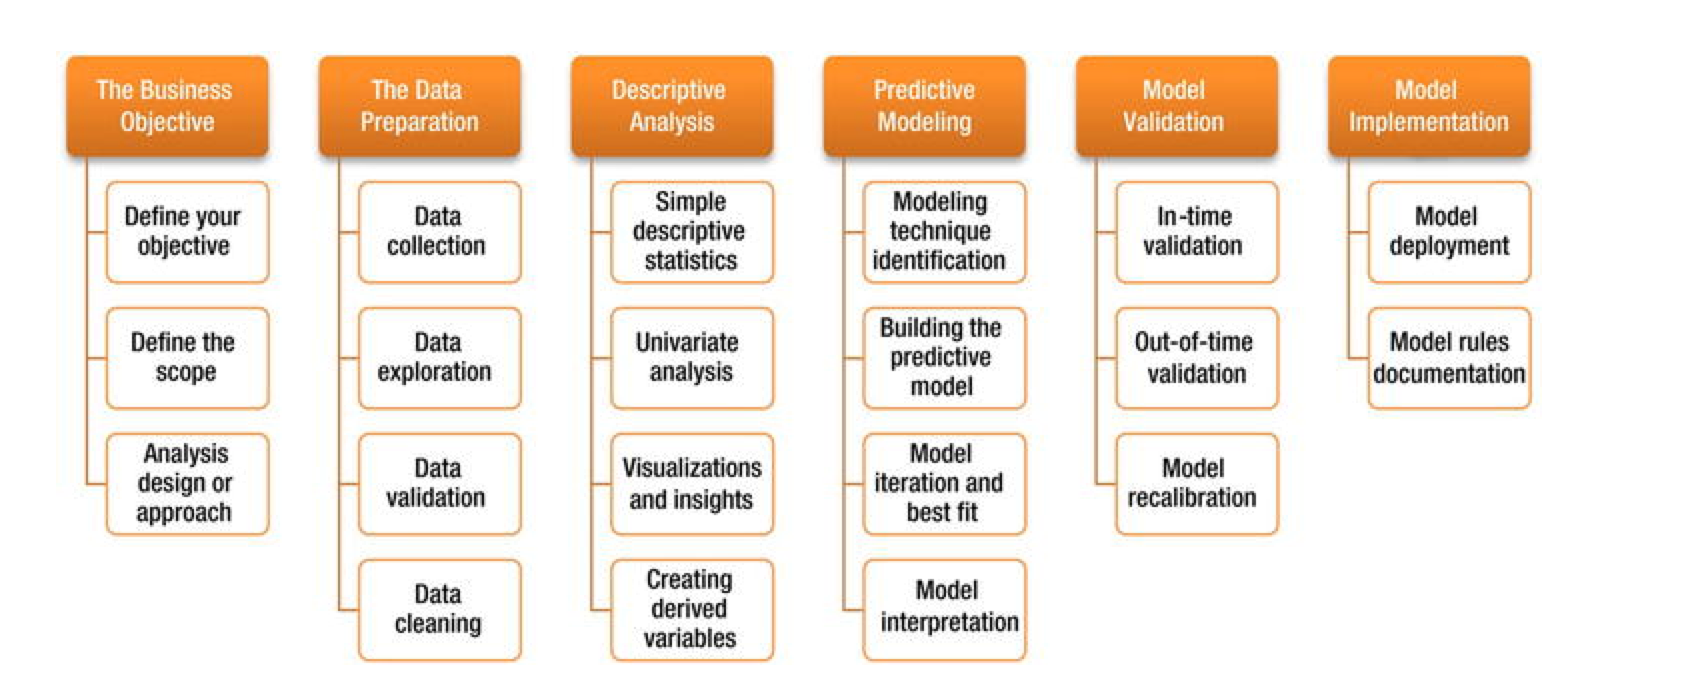

In [147]:
from IPython.display import Image
# Load image from local storage
Image(filename = "dspipeline.png", width = 600, height = 300)


In [148]:
import pandas as pd

#data = pd.read_csv("data/titanic-data.csv")

raw_data = pd.read_excel("data/titanic.xls")

raw_data.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1.  ** pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
2.  ** survived:** Outcome of survival (0 = No; 1 = Yes)
3.  ** name:** Name of passenger
4.  ** sex: **Sex of the passenger
5.  ** age:** Age of the passenger (Some entries contain NaN)
6.  ** sibsp:** Number of siblings and spouses of the passenger aboard
7.  ** parch:** Number of parents and children of the passenger aboard
8.  ** ticket:** Ticket number of the passenger
9.  ** fare: **Fare paid by the passenger
10. ** cabin** Cabin number of the passenger (Some entries contain NaN)
11. ** embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
12. ...

In [149]:
raw_data.shape


(1309, 14)

In [150]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
raw_data.columns

In [ ]:
raw_data.dtypes


In [ ]:
raw_data.head()

In [ ]:
raw_data.tail()

In [ ]:
raw_data.describe()


In [ ]:
raw_data.isnull().sum()

In [ ]:
data_copy = data.copy()

# Pandas Series and DataFrame

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


In [ ]:
print(type(raw_data["age"]))

In [ ]:
print(type(raw_data[["age"] ]))

In [ ]:
print(type(raw_data[["age", "sex"] ]))

In [ ]:
raw_data.index

In [ ]:
raw_data.set_index("name")

## Data cleaning

In [ ]:
raw_data.isnull().sum()

In [ ]:
raw_data.isna().sum()


In [ ]:
raw_data.notna().sum()

In [ ]:
(raw_data.isna().sum()/raw_data.shape[0]).sort_values(ascending=True)

In [ ]:
import seaborn as sns
sns.heatmap(raw_data.isna())

### Dealing with missing values

- Remove missing values: 
    - remove rows/columns with missing columns
    - drop rows/columns by percentage of missing values  
    - see pd.dropna(axis = , thresh = )
- Impute missing values:
    - Filling with generic values
    - Filling with central tendencies
    - see pd.fillna(), pd.bfill(), pd.ffill(), etc



In [ ]:
raw_data["embarked"].isnull().sum() # only 2 missing values

In [ ]:
raw_data["embarked"].value_counts()


In [ ]:
raw_data['embarked'].fillna('S', inplace=True)

In [ ]:
data = raw_data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.head()


In [ ]:
assert  data['age'].notnull().all()

In [ ]:
# data = data.dropna(axis=0)
data.dropna(axis=0, inplace = True)
data.shape

In [ ]:
assert  data['age'].notnull().all()

In [ ]:
data['sex'] = data['sex'].astype('category')
data['pcalss'] = data['pclass'].astype('category')


In [ ]:
data1 = data.head()
data2 = data.tail()
conc_data_row = pd.concat([data1,data2],axis = 0,ignore_index =True) 
conc_data_row

In [ ]:
data1 = data['age'].head()
data2= data['sex'].head()
conc_data_col = pd.concat([data1,data2], axis = 1) 
conc_data_col

## Indexing and filtering

In [ ]:
# indexing using square brackets
data["age"][0:9]


In [ ]:
# using column attribute and row label
data.age[0:9]

In [ ]:
# using loc accessor
data.loc[0:9,"age"]

In [ ]:
data.loc[0:9,["age", "sex"]]


In [ ]:
data.iloc[0:10, 0:2]

In [ ]:
# Selecting only some columns
data[["survived","pclass"]]

In [ ]:
# Creating boolean series
mask = data.age > 70
data[mask]

In [ ]:
first_mask = data.age > 70
second_mask = data.survived == 1
data[first_mask & second_mask]

In [ ]:
# Filtering column based on others
data.name[data.age<10]

In [ ]:
def div(n):
    return n/2
data.age.apply(div)

In [ ]:
data.age.apply(lambda n : n/2)


# Data visualization and summaries

In [ ]:
data['age'].hist()

In [ ]:
data['pclass'].value_counts().plot.bar()

In [ ]:
data_raw.plot(kind = "scatter",x="age",y = "fare")


In [ ]:
data.boxplot(column='age',by = 'sex')

In [ ]:
data.groupby(['sex']).mean()


In [ ]:
data.groupby(['sex', 'pclass']).mean()


In [ ]:
data['pclass'].value_counts().sort_values()


In [ ]:
data[data['age'] < 18]['pclass'].value_counts().sort_values()


In [ ]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

data['cat_ages'] = data['age'].map(category_ages)
data.head()

In [ ]:
data["age_new"] = data["age"]/100
data.head()

In [ ]:
data["income"] = 0
data.head()

In [ ]:
data['sex'].astype('category').cat.codes


In [ ]:
import seaborn as sns
sns.countplot(x='sex', hue='survived', data=data)

In [ ]:
sns.catplot(x="embarked", col="survived",
                 data=raw_data, kind="count",
                 height=4, aspect=.7)

In [ ]:
g = sns.countplot(x='embarked', hue='survived', data=raw_data)

In [ ]:
g = sns.countplot(x='embarked', hue='pclass', data=raw_data)

In [ ]:
def add_family(df):
    df['familysize'] = df['sibsp'] + df['parch'] + 1 
    return df

new_data = add_family(raw_data)
new_data.head(10)

In [ ]:
sns.countplot(x="familysize", hue="survived",
                 data=new_data);